Enter calorie limit (e.g. 2000):  1200


Running GA Variants...

Generation 1/50 (memetic=False, parallel=False)
Generation 11/50 (memetic=False, parallel=False)
Generation 21/50 (memetic=False, parallel=False)
Generation 31/50 (memetic=False, parallel=False)
Generation 41/50 (memetic=False, parallel=False)
Generation 50/50 (memetic=False, parallel=False)
Basic GA runtime: 3.11 seconds

Generation 1/50 (memetic=False, parallel=True)
Generation 11/50 (memetic=False, parallel=True)
Generation 21/50 (memetic=False, parallel=True)
Generation 31/50 (memetic=False, parallel=True)
Generation 41/50 (memetic=False, parallel=True)
Generation 50/50 (memetic=False, parallel=True)
Parallel GA runtime: 1.04 seconds

Generation 1/50 (memetic=True, parallel=True)
Generation 11/50 (memetic=True, parallel=True)
Generation 21/50 (memetic=True, parallel=True)
Generation 31/50 (memetic=True, parallel=True)
Generation 41/50 (memetic=True, parallel=True)
Generation 50/50 (memetic=True, parallel=True)
Memetic GA runtime: 51.84 seconds



Variant,Time (s),Speed Change
Basic GA,3.11,Baseline
Parallel GA,1.04,66.6% faster
Memetic GA,51.84,1564.9% slower


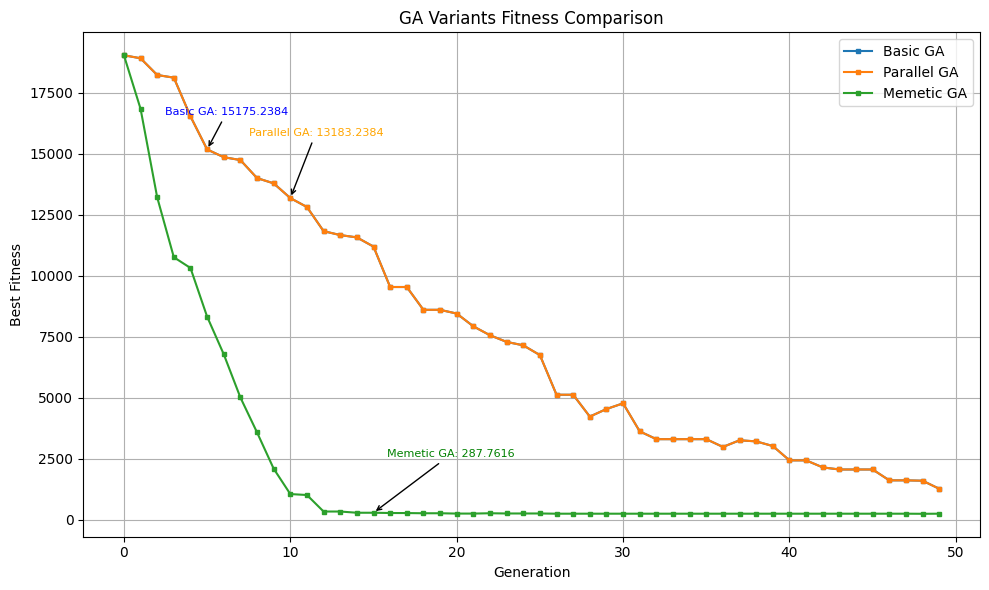

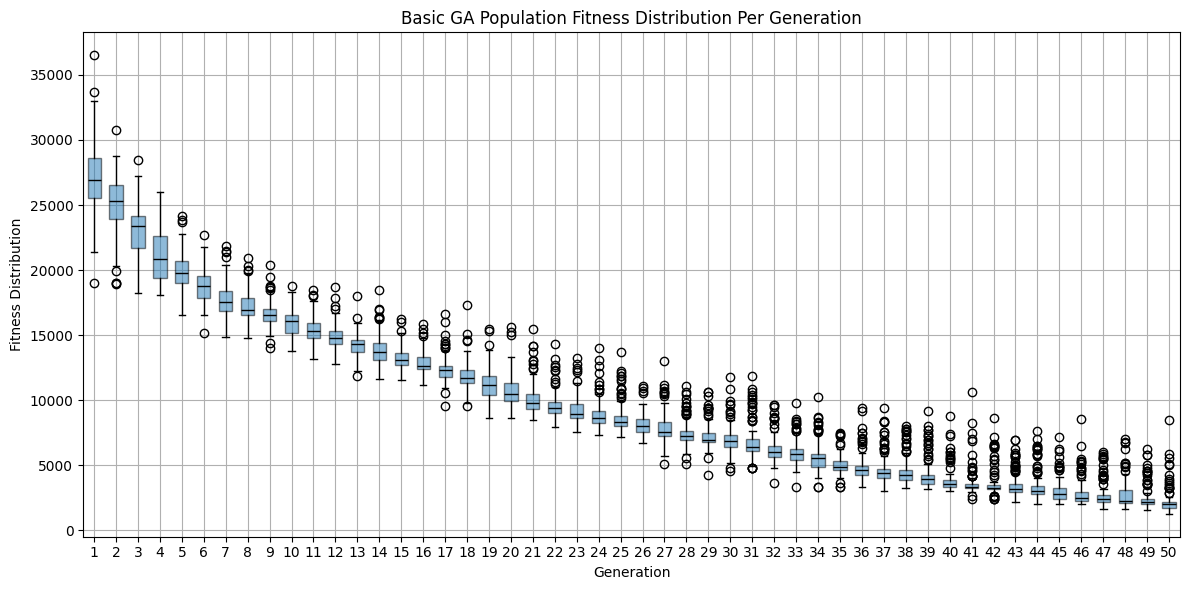

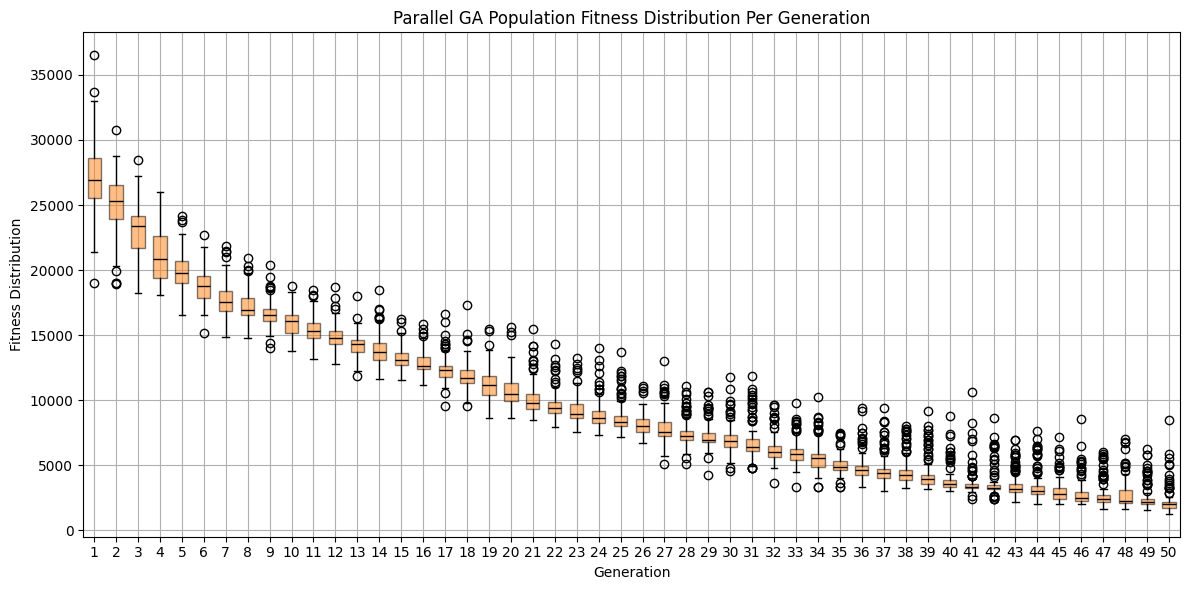

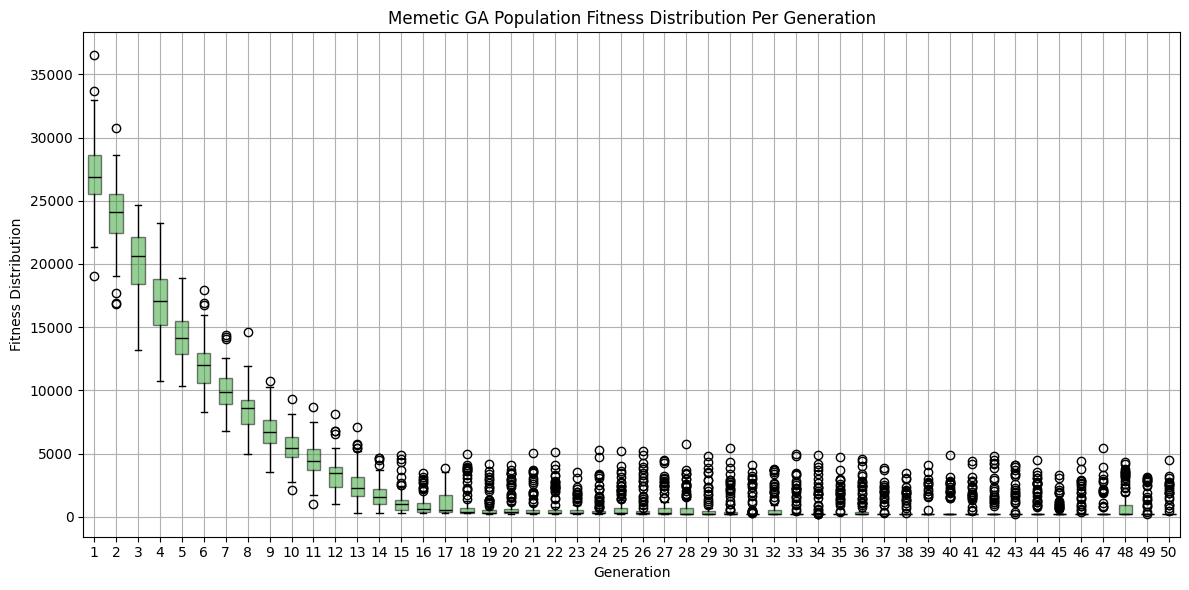

In [1]:
import time  # To measure how long each GA variant takes
import modules.ga_runner as ga_runner  # Module to run different versions of the genetic algorithm (GA)
import modules.utils as utils  # Utility functions (e.g., printing best solutions)
import modules.visualizer as visualizer  # Functions to create plots and visual summaries
from modules.config import NGEN  # Number of generations to run the GA

# Print a message to indicate the GA runs are starting
print("Running GA Variants...\n")

# Run the basic GA (no parallelization, no local search)
start = time.time()  # Start timer
fitness_basic, best_basic, all_basic = ga_runner.run_ga(memetic=False, parallel=False)  # Run GA
duration_basic = time.time() - start  # Calculate how long it took
print(f"Basic GA runtime: {duration_basic:.2f} seconds\n")  # Print the runtime

# Run the parallel GA (runs fitness evaluations in parallel for speed)
start = time.time()
fitness_parallel, best_parallel, all_parallel = ga_runner.run_ga(memetic=False, parallel=True)
duration_parallel = time.time() - start
print(f"Parallel GA runtime: {duration_parallel:.2f} seconds\n")

# Run the memetic GA (combines GA with local search, also parallel)
start = time.time()
fitness_memetic, best_memetic, all_memetic = ga_runner.run_ga(memetic=True, parallel=True)
duration_memetic = time.time() - start
print(f"Memetic GA runtime: {duration_memetic:.2f} seconds\n")

# Show a comparison table of runtimes for all three GA variants
visualizer.print_runtime_table(duration_basic, duration_parallel, duration_memetic)

# Print the best meal plans found by each GA variant, nicely formatted
utils.print_best_solution("Basic GA", best_basic)
utils.print_best_solution("Memetic GA", best_memetic)

# Generate a line plot comparing the best fitness per generation for each GA variant
visualizer.plot_fitness(fitness_basic, fitness_parallel, fitness_memetic)

# Generate boxplots showing the distribution of fitness values across the population
# for each generation and each GA variant
visualizer.plot_boxplots(all_basic, all_parallel, all_memetic, NGEN)
